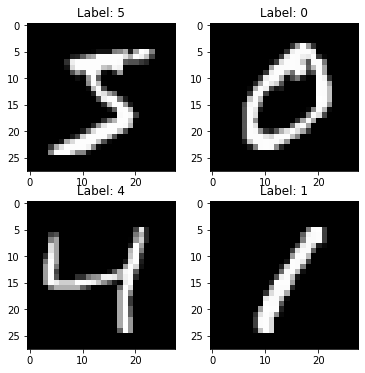

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import keras

def load_dataset(flatten=False):
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
    # normalize x
    X_train = X_train.astype(float) / 255.
    X_test = X_test.astype(float) / 255.
    # we reserve the last 10000 training examples for validation
    X_train, X_val = X_train[:-10000], X_train[-10000:]
    y_train, y_val = y_train[:-10000], y_train[-10000:]
    if flatten:
        X_train = X_train.reshape([X_train.shape[0], -1])
        X_val = X_val.reshape([X_val.shape[0], -1])
        X_test = X_test.reshape([X_test.shape[0], -1])
    return X_train, y_train, X_val, y_val, X_test, y_test


X_train, y_train, X_val, y_val, X_test, y_test = load_dataset(flatten=True)

plt.figure(figsize=[6,6])
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title("Label: %i"%y_train[i])
    plt.imshow(X_train[i].reshape([28,28]),cmap='gray');

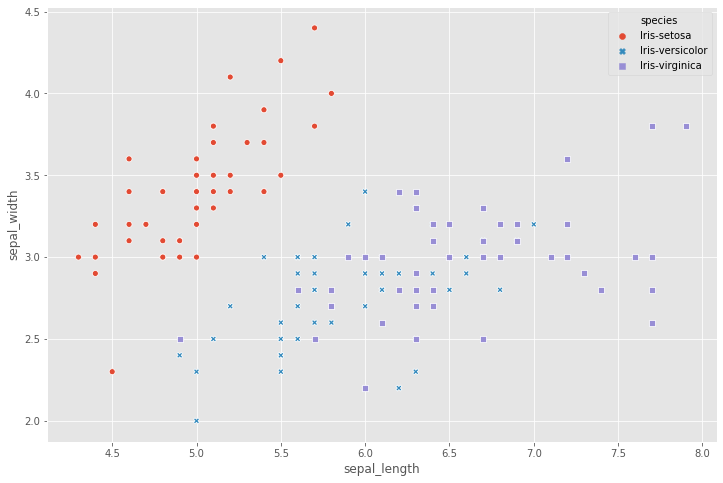

In [2]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)
sns.scatterplot(x = iris.sepal_length, y=iris.sepal_width, hue = iris.species, style=iris.species)

In [3]:
def standardize_data(arr):  
    rows, columns = arr.shape
    standardizedArray = np.zeros(shape=(rows, columns))
    tempArray = np.zeros(rows)
    for column in range(columns):
        mean = np.mean(X[:,column])
        std = np.std(X[:,column])
        tempArray = np.empty(0)
        for element in X[:,column]:
            tempArray = np.append(tempArray, ((element - mean) / std))
        standardizedArray[:,column] = tempArray
    return standardizedArray

type(X)
# y = iris.species.values
# X = standardize_data(X)

NameError: name 'iris' is not defined

In [31]:
covariance_matrix = np.cov(X.T)
covariance_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

Eigenvector: 
 [[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 1.+0.j]] 

Eigenvalues: 
 [ 5.14843641e+00+0.00000000e+00j  3.73006409e+00+0.00000000e+00j
  3.28428659e+00+0.00000000e+00j  2.84224610e+00+0.00000000e+00j
  2.56674829e+00+0.00000000e+00j  2.28226246e+00+0.00000000e+00j
  1.73170297e+00+0.00000000e+00j  1.52501789e+00+0.00000000e+00j
  1.46291112e+00+0.00000000e+00j  1.25003576e+00+0.00000000e+00j
  1.10927913e+00+0.00000000e+00j  1.06747964e+00+0.00000000e+00j
  9.06536617e-01+0.00000000e+00j  8.88574601e-01+0.00000000e+00j
  8.34404158e-01+0.00000000e+00j  7.88694682e-01+0.00000000e+00j
  6.96452447e-01+0.00000000e+00j  6.74465724e-01+0.00000000e+00j
  6.26893507e-01+0.00000000e+00j  6.08140559e-01+0.00000000e+00j
  5.64861441e-01+0

In [33]:
# Calculating the explained variance on each of components
variance_explained = []
for eigen_value in eigen_values:
     variance_explained.append((eigen_value/sum(eigen_values))*100)
        
print(variance_explained)

[(9.744385514317816+0j), (7.059848779005271+0j), (6.216130911727868+0j), (5.379486021167606+0j), (4.85805453905085+0j), (4.319611522837607+0j), (3.277574011940649+0j), (2.8863835721918156+0j), (2.7688348048879194+0j), (2.365928091830067+0j), (2.099519660276227+0j), (2.0204062658683997+0j), (1.7157912766466208+0j), (1.6817947779557898+0j), (1.5792670127153696+0j), (1.4927532218090318+0j), (1.3181674194264938+0j), (1.2765534050562464+0j), (1.1865140253919146+0j), (1.1510205400914904+0j), (1.0691066586095717+0j), (1.0074997006707098+0j), (0.9536297692411098+0j), (0.9078617616433197+0j), (0.8827880436461113+0j), (0.836950936041805+0j), (0.8175407663100077+0j), (0.784796040208739+0j), (0.7420140856803499+0j), (0.6907058970977251+0j), (0.6585629293543146+0j), (0.6436530092641662+0j), (0.6027188378680685+0j), (0.5853029639077602+0j), (0.5694306562243271+0j), (0.5418524329465804+0j), (0.5073091126637508+0j), (0.48839438411563774+0j), (0.48205446932620793+0j), (0.473350171486199+0j), (0.4559716

In [34]:
# Identifying components that explain at least 95%
cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)

[  9.74438551+0.00000000e+00j  16.80423429+0.00000000e+00j
  23.02036521+0.00000000e+00j  28.39985123+0.00000000e+00j
  33.25790577+0.00000000e+00j  37.57751729+0.00000000e+00j
  40.8550913 +0.00000000e+00j  43.74147487+0.00000000e+00j
  46.51030968+0.00000000e+00j  48.87623777+0.00000000e+00j
  50.97575743+0.00000000e+00j  52.9961637 +0.00000000e+00j
  54.71195497+0.00000000e+00j  56.39374975+0.00000000e+00j
  57.97301676+0.00000000e+00j  59.46576998+0.00000000e+00j
  60.7839374 +0.00000000e+00j  62.06049081+0.00000000e+00j
  63.24700483+0.00000000e+00j  64.39802537+0.00000000e+00j
  65.46713203+0.00000000e+00j  66.47463173+0.00000000e+00j
  67.4282615 +0.00000000e+00j  68.33612326+0.00000000e+00j
  69.21891131+0.00000000e+00j  70.05586224+0.00000000e+00j
  70.87340301+0.00000000e+00j  71.65819905+0.00000000e+00j
  72.40021314+0.00000000e+00j  73.09091903+0.00000000e+00j
  73.74948196+0.00000000e+00j  74.39313497+0.00000000e+00j
  74.99585381+0.00000000e+00j  75.58115677+0.00000000e+0

/Users/mohsen/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Explained variance vs Number of components')

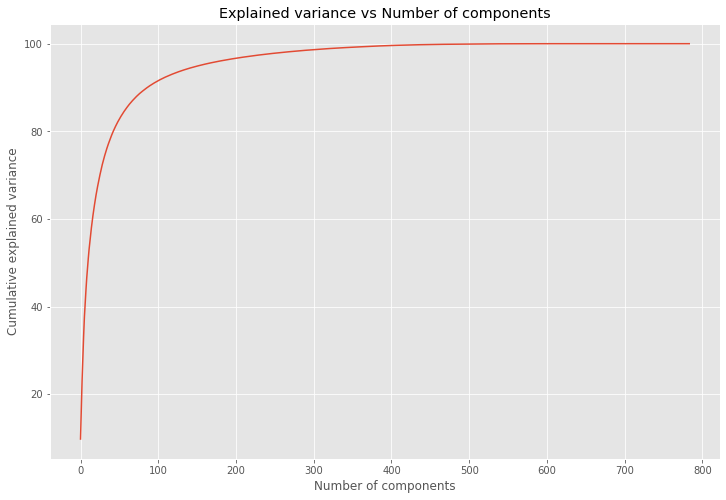

In [39]:
sns.lineplot(x = range(784), y=cumulative_variance_explained)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs Number of components")

In [17]:
# Using two first components (because those explain more than 95%)
projection_matrix = (eigen_vectors.T[:][:2]).T
print(projection_matrix)

[[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [18]:
# Getting the product of original standardized X and the eigenvectors 
X_pca = X.dot(projection_matrix)
print(X_pca)

[[-2.26454173e+00 -5.05703903e-01]
 [-2.08642550e+00  6.55404729e-01]
 [-2.36795045e+00  3.18477311e-01]
 [-2.30419716e+00  5.75367713e-01]
 [-2.38877749e+00 -6.74767397e-01]
 [-2.07053681e+00 -1.51854856e+00]
 [-2.44571134e+00 -7.45626750e-02]
 [-2.23384186e+00 -2.47613932e-01]
 [-2.34195768e+00  1.09514636e+00]
 [-2.18867576e+00  4.48629048e-01]
 [-2.16348656e+00 -1.07059558e+00]
 [-2.32737775e+00 -1.58587455e-01]
 [-2.22408272e+00  7.09118158e-01]
 [-2.63971626e+00  9.38281982e-01]
 [-2.19229151e+00 -1.88997851e+00]
 [-2.25146521e+00 -2.72237108e+00]
 [-2.20275048e+00 -1.51375028e+00]
 [-2.19017916e+00 -5.14304308e-01]
 [-1.89407429e+00 -1.43111071e+00]
 [-2.33994907e+00 -1.15803343e+00]
 [-1.91455639e+00 -4.30465163e-01]
 [-2.20464540e+00 -9.52457317e-01]
 [-2.77416979e+00 -4.89517027e-01]
 [-1.82041156e+00 -1.06750793e-01]
 [-2.22821750e+00 -1.62186163e-01]
 [-1.95702401e+00  6.07892567e-01]
 [-2.05206331e+00 -2.66014312e-01]
 [-2.16819365e+00 -5.52016495e-01]
 [-2.14030596e+00 -3

In [30]:
X = X_train
y = y_train

In [38]:
X.shape[1]

784

In [5]:
# Data-preprocessing: Standardizing the data
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

NameError: name 'data' is not defined